In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score


In [2]:
# load the dataset 
df = pd.read_csv(r"C:\Users\balac\Documents\project\crime rate prediction\project\VICTIMS_OF_KA_0.csv")
# Load the dataset into a DataFrame
data = pd.read_csv(r"C:\Users\balac\Documents\project\crime rate prediction\project\dataset - Sheet1.csv")

In [3]:
data.dropna()

,STATE/UT,YEAR,Purpose,Male,Female
0,Andhra Pradesh,2001,For Adoption,3,5
1,Andhra Pradesh,2001,For Begging,2,0
2,Andhra Pradesh,2001,For Camel racing,0,0
3,Andhra Pradesh,2001,For Illicit intercourse,0,78
4,Andhra Pradesh,2001,For marriage,7,332
...,...,...,...,...,...
5861,Puducherry,2012,For Selling body parts,0,0
5862,Puducherry,2012,For Slavery,0,0
5863,Puducherry,2012,For unlawaful activity,0,0
5864,Puducherry,2012,Others,3,5


In [4]:
df.dropna()

,STATE/UT,YEAR,Pupose,Total No. of cases reported,Male upto 10 years,Female upto 10 years,Male 10-15 years,Female 10-15 years,Male 15-18 years,Female 15-18 years,Male 18-30 years,Female 18-30 years,Male 30-50 years,Female 30-50 years,Male above 50 years,Female above 50 years,Total Male,Total Female,Grand Total
0,Andhra Pradesh,2001,For Adoption,8,3,1,0,0,0,0,0,4,0,0,0,0,3,5,8
1,Andhra Pradesh,2001,For Begging,2,0,0,2,0,0,0,0,0,0,0,0,0,2,0,2
2,Andhra Pradesh,2001,For Camel racing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Andhra Pradesh,2001,For Illicit intercourse,78,0,2,0,25,0,24,0,25,0,2,0,0,0,78,78
4,Andhra Pradesh,2001,For marriage,339,0,0,0,73,1,164,6,91,0,4,0,0,7,332,339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5861,Puducherry,2012,For Selling body parts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5862,Puducherry,2012,For Slavery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5863,Puducherry,2012,For unlawaful activity,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5864,Puducherry,2012,Others,8,2,4,1,1,0,0,0,0,0,0,0,0,3,5,8


In [5]:
df.shape

(5866, 19)

In [6]:
data.shape

(5866, 5)

In [7]:
df.describe()

,YEAR,Total No. of cases reported,Male upto 10 years,Female upto 10 years,Male 10-15 years,Female 10-15 years,Male 15-18 years,Female 15-18 years,Male 18-30 years,Female 18-30 years,Male 30-50 years,Female 30-50 years,Male above 50 years,Female above 50 years,Total Male,Total Female,Grand Total
count,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000
mean,2006.513126,121.667917,1.802932,1.216161,2.426526,6.320491,2.510740,19.857143,16.400614,52.993863,8.548585,9.842823,0.955336,0.363450,32.644732,90.593931,123.238663
std,3.445978,465.198526,16.321285,9.121776,30.860644,36.194204,17.738711,117.901238,75.366121,218.121242,36.858145,54.903563,7.395493,6.547786,141.072094,377.255718,469.614659
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2010.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,4.000000,7.000000,22.000000
max,2012.000000,8878.000000,408.000000,209.000000,953.000000,906.000000,530.000000,3081.000000,1371.000000,3682.000000,1042.000000,1053.000000,334.000000,332.000000,2465.000000,7919.000000,8888.000000


In [8]:
data.describe()

,YEAR,Male,Female
count,5866.000000,5866.000000,5866.000000
mean,2006.513126,32.644732,90.593931
std,3.445978,141.072094,377.255718
min,2001.000000,0.000000,0.000000
25%,2004.000000,0.000000,0.000000
50%,2007.000000,0.000000,0.000000
75%,2010.000000,4.000000,7.000000
max,2012.000000,2465.000000,7919.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5866 entries, 0 to 5865
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   STATE/UT                     5866 non-null   object
 1   YEAR                         5866 non-null   int64 
 2   Pupose                       5866 non-null   object
 3   Total No. of cases reported  5866 non-null   int64 
 4   Male upto 10 years           5866 non-null   int64 
 5   Female upto 10 years         5866 non-null   int64 
 6   Male 10-15 years             5866 non-null   int64 
 7   Female 10-15 years           5866 non-null   int64 
 8   Male 15-18 years             5866 non-null   int64 
 9   Female 15-18 years           5866 non-null   int64 
 10  Male 18-30 years             5866 non-null   int64 
 11  Female 18-30 years           5866 non-null   int64 
 12  Male 30-50 years             5866 non-null   int64 
 13  Female 30-50 years           5866

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5866 entries, 0 to 5865
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   STATE/UT  5866 non-null   object
 1   YEAR      5866 non-null   int64 
 2   Purpose   5866 non-null   object
 3   Male      5866 non-null   int64 
 4   Female    5866 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 229.3+ KB


In [11]:
df.drop_duplicates()

,STATE/UT,YEAR,Pupose,Total No. of cases reported,Male upto 10 years,Female upto 10 years,Male 10-15 years,Female 10-15 years,Male 15-18 years,Female 15-18 years,Male 18-30 years,Female 18-30 years,Male 30-50 years,Female 30-50 years,Male above 50 years,Female above 50 years,Total Male,Total Female,Grand Total
0,Andhra Pradesh,2001,For Adoption,8,3,1,0,0,0,0,0,4,0,0,0,0,3,5,8
1,Andhra Pradesh,2001,For Begging,2,0,0,2,0,0,0,0,0,0,0,0,0,2,0,2
2,Andhra Pradesh,2001,For Camel racing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Andhra Pradesh,2001,For Illicit intercourse,78,0,2,0,25,0,24,0,25,0,2,0,0,0,78,78
4,Andhra Pradesh,2001,For marriage,339,0,0,0,73,1,164,6,91,0,4,0,0,7,332,339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5861,Puducherry,2012,For Selling body parts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5862,Puducherry,2012,For Slavery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5863,Puducherry,2012,For unlawaful activity,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5864,Puducherry,2012,Others,8,2,4,1,1,0,0,0,0,0,0,0,0,3,5,8


In [12]:
data.drop_duplicates()

,STATE/UT,YEAR,Purpose,Male,Female
0,Andhra Pradesh,2001,For Adoption,3,5
1,Andhra Pradesh,2001,For Begging,2,0
2,Andhra Pradesh,2001,For Camel racing,0,0
3,Andhra Pradesh,2001,For Illicit intercourse,0,78
4,Andhra Pradesh,2001,For marriage,7,332
...,...,...,...,...,...
5861,Puducherry,2012,For Selling body parts,0,0
5862,Puducherry,2012,For Slavery,0,0
5863,Puducherry,2012,For unlawaful activity,0,0
5864,Puducherry,2012,Others,3,5


In [13]:
# Select relevant columns for age groups
age_group_columns = [
    'Male upto 10 years', 'Female upto 10 years',
    'Male 10-15 years', 'Female 10-15 years',
    'Male 15-18 years', 'Female 15-18 years',
    'Male 18-30 years', 'Female 18-30 years',
    'Male 30-50 years', 'Female 30-50 years',
    'Male above 50 years', 'Female above 50 years'
]

# Create a DataFrame with only the selected columns
age_group_df = df[age_group_columns]

# Select the features for clustering (male and female columns)
features = data[['Male', 'Female']]

In [14]:
# Normalize numerical features for decision tree
MinMax = MinMaxScaler()
age_group_data = MinMax.fit_transform(age_group_df)
age_group_labels = df['Grand Total'] 

# Standardize the data (scaling) for k-means
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [15]:
# Encode age group labels
label_encoder = LabelEncoder()
age_group_labels_encoded = label_encoder.fit_transform(age_group_labels)

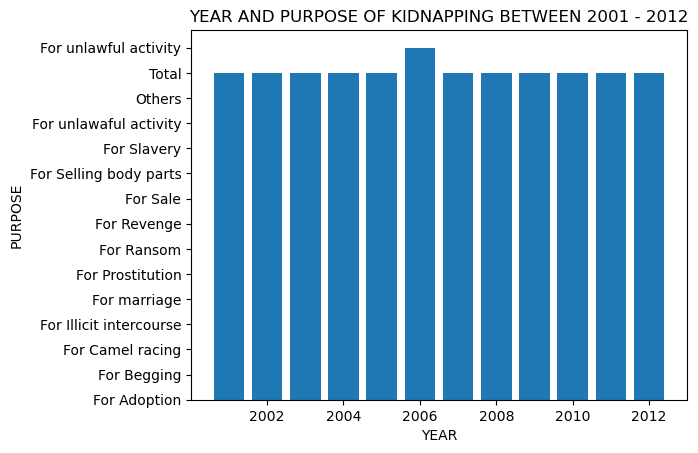

In [16]:
# year and purpose of kidnapping in between 2001 t0 2012

x1 = df["YEAR"]  
y1 = df["Pupose"]
plt.bar(x1,y1)
plt.xlabel("YEAR")
plt.ylabel("PURPOSE")
plt.title("YEAR AND PURPOSE OF KIDNAPPING BETWEEN 2001 - 2012")
plt.show()

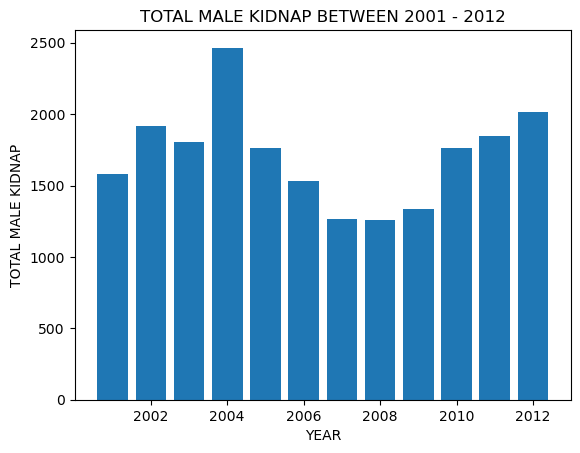

In [17]:
# total male kidnap between 2001 to 2012

x1 = df["YEAR"]  
y1 = df["Total Male"]
plt.bar(x1,y1)
plt.xlabel("YEAR")
plt.ylabel("TOTAL MALE KIDNAP")
plt.title("TOTAL MALE KIDNAP BETWEEN 2001 - 2012")
plt.show()

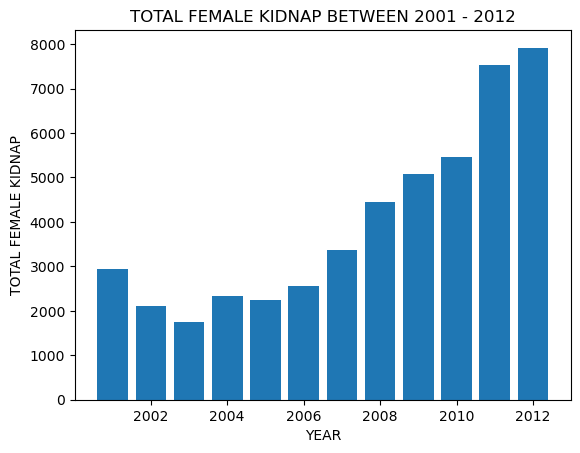

In [18]:
# total female kidnap between 2001 to 2012

x1 = df["YEAR"]  
y1 = df["Total Female"]
plt.bar(x1,y1)
plt.xlabel("YEAR")
plt.ylabel("TOTAL FEMALE KIDNAP")
plt.title("TOTAL FEMALE KIDNAP BETWEEN 2001 - 2012")
plt.show()

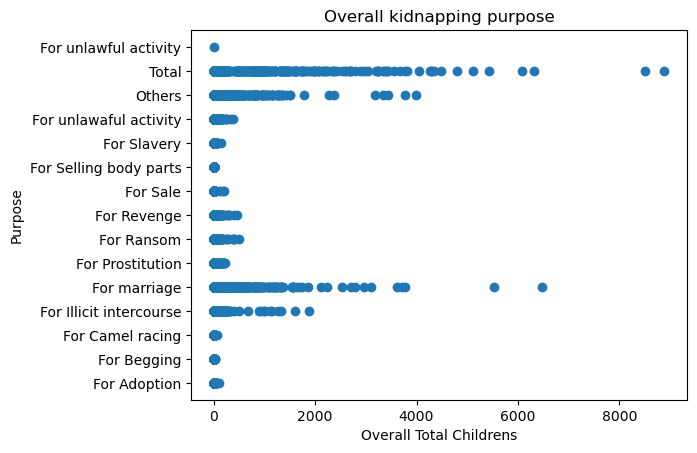

In [19]:
y = df["Pupose"]
x = df["Grand Total"]
plt.scatter(x,y)
plt.xlabel("Overall Total Childrens")
plt.ylabel("Purpose")
plt.title("Overall kidnapping purpose")
plt.show()

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    age_group_data, age_group_labels_encoded, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)  # decision tree algorithm

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

In [21]:
# Determine the optimal number of clusters (K) using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


# Based on the elbow method, choose an appropriate K (e.g., K=3)

# Apply K-Means clustering with the chosen K
kmeans = KMeans(n_clusters=3, random_state=0)    # kmeans algorithm
data['Cluster'] = kmeans.fit_predict(scaled_features)

c:\Users\balac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\balac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\balac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\balac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [22]:
# Evaluate the decision tree model performance 
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy of decision_tree: {accuracy * 100:.2f}%')

Mean Squared Error: 312.25383304940374
Accuracy of decision_tree: 66.52%


In [23]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(scaled_features, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.89


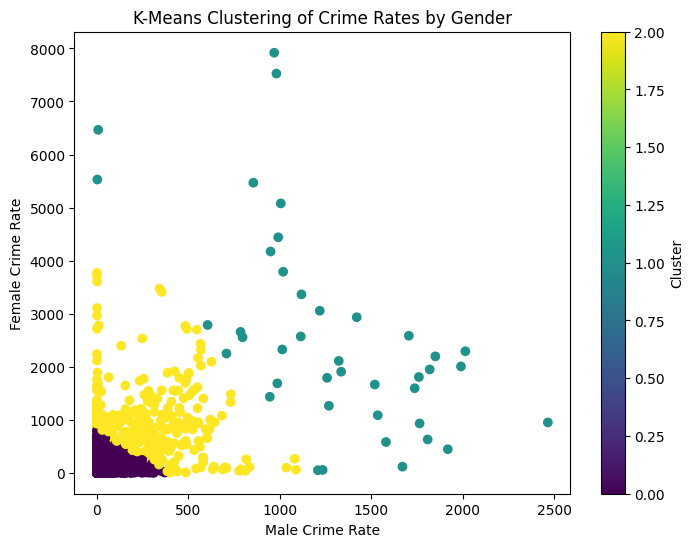

In [89]:
# Create a scatter plot of male vs. female crime rates, colored by cluster
plt.figure(figsize=(8, 6))
plt.scatter(data['Male'], data['Female'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Male Crime Rate')
plt.ylabel('Female Crime Rate')
plt.title('K-Means Clustering of Crime Rates by Gender')
plt.colorbar(label='Cluster')
plt.show()

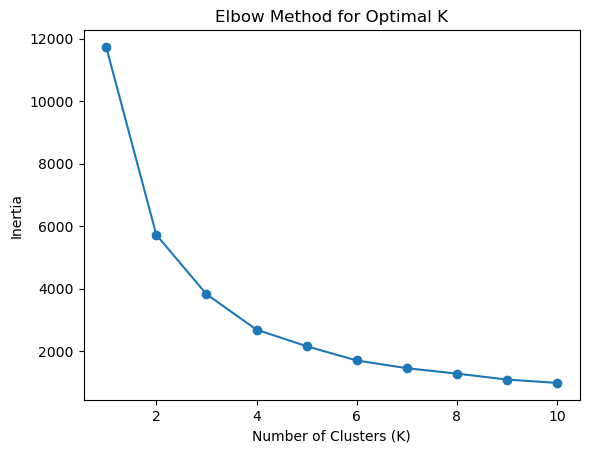

In [24]:
# Plot the elbow method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()